In [1]:
import numpy
import math
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = 10

In [7]:
# define baseline model
def base_model(hidden_layers, neurons):
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    for h in range(hidden_layers):
        model.add(Dense(int(num_pixels/(math.pow(2,neurons+1))), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return model

In [8]:
for layer in range(1, 3):
    for neuron in range(0, 4):
        # build the model
        model = base_model(layer, neuron)
        # Fit the model
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
        # Final evaluation of the model
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 18s - loss: 0.2317 - acc: 0.9317 - val_loss: 0.1006 - val_acc: 0.9693
Epoch 2/10
 - 17s - loss: 0.0763 - acc: 0.9774 - val_loss: 0.0788 - val_acc: 0.9761
Epoch 3/10
 - 17s - loss: 0.0499 - acc: 0.9856 - val_loss: 0.0635 - val_acc: 0.9805
Epoch 4/10
 - 17s - loss: 0.0340 - acc: 0.9907 - val_loss: 0.0598 - val_acc: 0.9807
Epoch 5/10
 - 17s - loss: 0.0244 - acc: 0.9939 - val_loss: 0.0584 - val_acc: 0.9824
Epoch 6/10
 - 17s - loss: 0.0178 - acc: 0.9964 - val_loss: 0.0575 - val_acc: 0.9832
Epoch 7/10
 - 17s - loss: 0.0131 - acc: 0.9977 - val_loss: 0.0551 - val_acc: 0.9827
Epoch 8/10
 - 17s - loss: 0.0098 - acc: 0.9985 - val_loss: 0.0562 - val_acc: 0.9828
Epoch 9/10
 - 17s - loss: 0.0073 - acc: 0.9993 - val_loss: 0.0568 - val_acc: 0.9830
Epoch 10/10
 - 17s - loss: 0.0058 - acc: 0.9995 - val_loss: 0.0558 - val_acc: 0.9830
Baseline Error: 1.70%
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 14s - loss: 0.2464 - ac

In [11]:
# checking for neural network with 0 hidden layers
layer = 0
for neuron in range(0, 4):
    # build the model
    model = base_model(layer, neuron)
    # Fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 0.2543 - acc: 0.9296 - val_loss: 0.1353 - val_acc: 0.9594
Epoch 2/10
 - 12s - loss: 0.1143 - acc: 0.9679 - val_loss: 0.1085 - val_acc: 0.9682
Epoch 3/10
 - 11s - loss: 0.0856 - acc: 0.9764 - val_loss: 0.0922 - val_acc: 0.9723
Epoch 4/10
 - 10s - loss: 0.0694 - acc: 0.9813 - val_loss: 0.0819 - val_acc: 0.9753
Epoch 5/10
 - 11s - loss: 0.0587 - acc: 0.9841 - val_loss: 0.0760 - val_acc: 0.9766
Epoch 6/10
 - 11s - loss: 0.0503 - acc: 0.9869 - val_loss: 0.0714 - val_acc: 0.9786
Epoch 7/10
 - 11s - loss: 0.0440 - acc: 0.9891 - val_loss: 0.0688 - val_acc: 0.9795
Epoch 8/10
 - 11s - loss: 0.0392 - acc: 0.9905 - val_loss: 0.0676 - val_acc: 0.9793
Epoch 9/10
 - 11s - loss: 0.0350 - acc: 0.9918 - val_loss: 0.0656 - val_acc: 0.9795
Epoch 10/10
 - 11s - loss: 0.0315 - acc: 0.9927 - val_loss: 0.0620 - val_acc: 0.9806
Baseline Error: 1.94%
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 0.2502 - ac

In [9]:
# best model with relu activation function - 2 hidden layers, 196 neurons - 98.34%
# build the model
model = base_model(2, 1)
# Fit the model
output = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.2700 - acc: 0.9163 - val_loss: 0.1214 - val_acc: 0.9625
Epoch 2/10
 - 18s - loss: 0.0802 - acc: 0.9758 - val_loss: 0.0789 - val_acc: 0.9753
Epoch 3/10
 - 17s - loss: 0.0507 - acc: 0.9848 - val_loss: 0.0669 - val_acc: 0.9804
Epoch 4/10
 - 15s - loss: 0.0337 - acc: 0.9906 - val_loss: 0.0671 - val_acc: 0.9807
Epoch 5/10
 - 15s - loss: 0.0224 - acc: 0.9941 - val_loss: 0.0607 - val_acc: 0.9818
Epoch 6/10
 - 15s - loss: 0.0159 - acc: 0.9961 - val_loss: 0.0615 - val_acc: 0.9822
Epoch 7/10
 - 15s - loss: 0.0110 - acc: 0.9979 - val_loss: 0.0588 - val_acc: 0.9831
Epoch 8/10
 - 15s - loss: 0.0075 - acc: 0.9988 - val_loss: 0.0588 - val_acc: 0.9828
Epoch 9/10
 - 15s - loss: 0.0054 - acc: 0.9994 - val_loss: 0.0599 - val_acc: 0.9834
Epoch 10/10
 - 17s - loss: 0.0040 - acc: 0.9996 - val_loss: 0.0601 - val_acc: 0.9834
Baseline Error: 1.66%


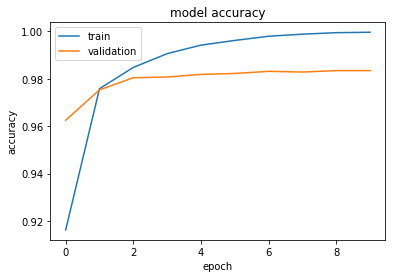

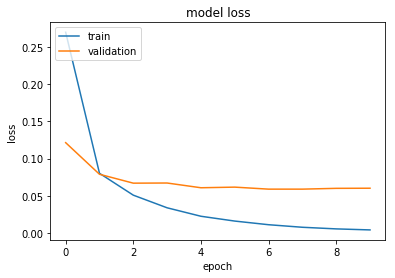

In [10]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()